In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
r = requests.get('https://listado.mercadolibre.com.ar/computadora')

In [3]:
r.status_code

200

In [4]:
r.content

b'\n<!DOCTYPE html>\n<html lang="es-AR">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.ar"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.ar"/><script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":1201.76576,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"881105b501898b53"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-data

In [5]:
r.text

'\n<!DOCTYPE html>\n<html lang="es-AR">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.ar"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.ar"/><script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":1201.76576,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"881105b501898b53"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-data.

In [6]:
soup = BeautifulSoup(r.content,'html.parser')

In [7]:
titulos=soup.find_all('h2',attrs={"class":"ui-search-item__title shops__item-title"})
titulos

[<h2 aria-level="3" class="ui-search-item__title shops__item-title">Monitor gamer Samsung F24T35 led 24" azul y gris oscuro 100V/240V</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Pc Armada Intel Core I5 8gb Ssd240 W10 Office</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops_

In [8]:
titulos= [i.text for i in titulos]
titulos


['Monitor gamer Samsung F24T35 led 24" azul y gris oscuro 100V/240V',
 'Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)',
 'Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb',
 'Pc Armada Intel Core I5 8gb Ssd240 W10 Office',
 "Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p",
 'Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows',
 'Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb',
 'Computadora Cpu Armada Intel Core I5 8 Gb 240 Gb Ssd',
 'Computadora Pc Cpu Solarmax Intel Core I7 12va 32gb 960 Ssd',
 'Computadora De Oficina / Trabajo  - 8 Gb - Ssd - Office',
 'Pc Armada Intel C I3 + 8 Gb Ram Ssd 240 Gab  Kit  W10 Offic ',
 'Pc Armada Intel Core I5 8gb Ssd 480 Gab   Tec Y Mouse  W11',
 'Notebook Ssd Ryzen Computadora Portatil 15.6 Pulgadas Laptop',
 'Kingston SNV2S/500G 500 GB - Azul',
 'Cpu Dell 780 - 4 Gb, Disco 250 Gb + Monitor 17 ',
 'Computadora Win10, Wifi, Lcd 17, Dual Core, Hd 320, 4gb',
 'Computadora  Wifi  

In [9]:
urls=soup.find_all('a',attrs={"class":"ui-search-item__group__element shops__items-group-details ui-search-link"})
urls

[<a class="ui-search-item__group__element shops__items-group-details ui-search-link" href="https://www.mercadolibre.com.ar/monitor-gamer-samsung-f24t35-led-24-azul-y-gris-oscuro-100v240v/p/MLA17360590?pdp_filters=category:MLA1648#searchVariation=MLA17360590&amp;position=1&amp;search_layout=stack&amp;type=product&amp;tracking_id=8000e752-8d31-4c25-98f0-6364149c6f75" title='Monitor gamer Samsung F24T35 led 24" azul y gris oscuro 100V/240V'><h2 aria-level="3" class="ui-search-item__title shops__item-title">Monitor gamer Samsung F24T35 led 24" azul y gris oscuro 100V/240V</h2></a>,
 <a class="ui-search-item__group__element shops__items-group-details ui-search-link" href="https://www.mercadolibre.com.ar/notebook-hp-amd-ryzen-7-5700u-12gb-256gb-ssd-156-touchscreen-tactil-windows-11-15-ef2081ms/p/MLA19569670?pdp_filters=category:MLA1648#searchVariation=MLA19569670&amp;position=2&amp;search_layout=stack&amp;type=product&amp;tracking_id=8000e752-8d31-4c25-98f0-6364149c6f75" title="Notebook Hp A

In [10]:
urls[0].get('href')


'https://www.mercadolibre.com.ar/monitor-gamer-samsung-f24t35-led-24-azul-y-gris-oscuro-100v240v/p/MLA17360590?pdp_filters=category:MLA1648#searchVariation=MLA17360590&position=1&search_layout=stack&type=product&tracking_id=8000e752-8d31-4c25-98f0-6364149c6f75'

In [11]:
urls=[i.get('href') for i in urls]
urls

['https://www.mercadolibre.com.ar/monitor-gamer-samsung-f24t35-led-24-azul-y-gris-oscuro-100v240v/p/MLA17360590?pdp_filters=category:MLA1648#searchVariation=MLA17360590&position=1&search_layout=stack&type=product&tracking_id=8000e752-8d31-4c25-98f0-6364149c6f75',
 'https://www.mercadolibre.com.ar/notebook-hp-amd-ryzen-7-5700u-12gb-256gb-ssd-156-touchscreen-tactil-windows-11-15-ef2081ms/p/MLA19569670?pdp_filters=category:MLA1648#searchVariation=MLA19569670&position=2&search_layout=stack&type=product&tracking_id=8000e752-8d31-4c25-98f0-6364149c6f75',
 'https://www.mercadolibre.com.ar/computador-portatil-evoo-14-pulgadas-intel-4gb-64gb/p/MLA21304987?pdp_filters=category:MLA1648#searchVariation=MLA21304987&position=3&search_layout=stack&type=product&tracking_id=8000e752-8d31-4c25-98f0-6364149c6f75',
 'https://articulo.mercadolibre.com.ar/MLA-874819289-pc-armada-intel-core-i5-8gb-ssd240-w10-office-_JM#position=17&search_layout=stack&type=item&tracking_id=8000e752-8d31-4c25-98f0-6364149c6f75

In [12]:
#//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]

In [13]:
dom= etree.HTML(str(soup))
precios=dom.xpath('//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]')
precios[0].text

'86.449'

In [14]:
precios=[i.text for i in precios]
precios


['86.449',
 '698.021',
 '264.999',
 '189.999',
 '1.573.218',
 '249.999',
 '198.998',
 '194.990',
 '801.390',
 '152.989',
 '169.999',
 '199.999',
 '729.266',
 '23.499',
 '90.700',
 '85.600',
 '139.000',
 '2.331',
 '414.190',
 '14.999',
 '119.998',
 '19.941',
 '184.990',
 '2.699',
 '129.999',
 '169.999',
 '10.499',
 '122.800',
 '39.899',
 '273.999',
 '4.199',
 '3.699',
 '439.999',
 '159.999',
 '2.199',
 '22.500',
 '146.999',
 '169.990',
 '16.153',
 '149.990',
 '8.870',
 '7.936',
 '373.499',
 '229.000',
 '2.966',
 '8.812',
 '1.800',
 '279.990',
 '12.949',
 '224.990',
 '4.799',
 '11.699',
 '1.699',
 '1.899']

In [15]:
df=pd.DataFrame({'titulo':titulos,'url':urls,'precio':precios})
df


,titulo,url,precio
0,"Monitor gamer Samsung F24T35 led 24"" azul y gr...",https://www.mercadolibre.com.ar/monitor-gamer-...,86.449
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698.021
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264.999
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189.999
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1.573.218
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249.999
6,Pc Cpu Computadora Intel Core I5 16gb Ram Ssd ...,https://articulo.mercadolibre.com.ar/MLA-13725...,198.998
7,Computadora Cpu Armada Intel Core I5 8 Gb 240 ...,https://articulo.mercadolibre.com.ar/MLA-86096...,194.990
8,Computadora Pc Cpu Solarmax Intel Core I7 12va...,https://click1.mercadolibre.com.ar/mclics/clic...,801.390
9,Computadora De Oficina / Trabajo - 8 Gb - Ssd...,https://click1.mercadolibre.com.ar/mclics/clic...,152.989


In [16]:
df.to_csv('computadores_mercado_libre.csv')

In [17]:
#//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]

In [18]:
dom= etree.HTML(str(soup))
siguiente=dom.xpath('//li[@class="andes-pagination__button andes-pagination__button--next shops__pagination-button"]//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]')[0].get('href')
siguiente


'https://listado.mercadolibre.com.ar/computacion/computadora_Desde_51_NoIndex_True'

In [19]:
ini= soup.find('span',attrs={'class':'andes-pagination__link'})
ini=int(ini.text)
ini

1

In [20]:
# //li[@class="andes-pagination__page-count"]

In [21]:
can= soup.find('li',attrs={'class':'andes-pagination__page-count'})
can=int(can.text.split(sep=" ",maxsplit=1)[1])
can

40

In [22]:
lista_titulos=[]
lista_urls=[]
lista_precios=[]


In [23]:
lista_titulos=[]
lista_urls=[]
lista_precios=[]
siguiente='https://listado.mercadolibre.com.ar/computadora'
while True:
  r= requests.get(siguiente)
  if r.status_code ==200:
    soup=BeautifulSoup(r.content,'html.parser')
    #Titulos
    titulos=soup.find_all('h2',attrs={"class":"ui-search-item__title shops__item-title"})
    titulos= [i.text for i in titulos]
    lista_titulos.extend(titulos)
    #Urls
    urls=soup.find_all('a',attrs={"class":"ui-search-item__group__element shops__items-group-details ui-search-link"})
    urls=[i.get('href') for i in urls]
    lista_urls.extend(urls)
    #Precios
    dom= etree.HTML(str(soup))
    precios=dom.xpath('//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]')
    precios=[i.text for i in precios]
    lista_precios.extend(precios)
    ini= soup.find('span',attrs={'class':'andes-pagination__link'})
    ini=int(ini.text)
    can= soup.find('li',attrs={'class':'andes-pagination__page-count'})
    can=int(can.text.split(sep=" ",maxsplit=1)[1])




  else:
    break
  print(ini,can,siguiente)

  if ini==can:
    break
  siguiente=dom.xpath('//li[@class="andes-pagination__button andes-pagination__button--next shops__pagination-button"]//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]')[0].get('href')

1 40 https://listado.mercadolibre.com.ar/computadora
2 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_51_NoIndex_True
3 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_101_NoIndex_True
4 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_151_NoIndex_True
5 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_201_NoIndex_True
6 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_251_NoIndex_True
7 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_301_NoIndex_True
8 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_351_NoIndex_True
9 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_401_NoIndex_True
10 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_451_NoIndex_True
11 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_501_NoIndex_True
12 40 https://listado.mercadolibre.com.ar/computacion/computadora_

In [24]:
print(len(lista_titulos))
print(len(lista_urls))
print(len(lista_precios))



2197
2197
2197


In [25]:
df=pd.DataFrame({'titulo':lista_titulos,'url':lista_urls,'precio':lista_precios})
df


,titulo,url,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75.299
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698.021
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264.999
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189.999
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1.573.218
...,...,...,...
2192,"Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola",https://articulo.mercadolibre.com.ar/MLA-93478...,4.990
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,https://articulo.mercadolibre.com.ar/MLA-91396...,8.590
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41.999
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,https://www.mercadolibre.com.ar/microfono-shur...,155.399


In [26]:
df.shape

(2197, 3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titulo  2197 non-null   object
 1   url     2197 non-null   object
 2   precio  2197 non-null   object
dtypes: object(3)
memory usage: 51.6+ KB


In [28]:
df['precio'] = df['precio'].str.replace('.', '').apply(float)

<ipython-input-28-77b41d39d7f3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['precio'] = df['precio'].str.replace('.', '').apply(float)


In [29]:
df.dtypes


titulo     object
url        object
precio    float64
dtype: object

In [30]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
precio,2197.0,181181.676832,296270.240167,525.0,6613.0,25999.0,295299.0,4966470.0


In [31]:
df.isna().sum()

titulo    0
url       0
precio    0
dtype: int64

In [62]:

df.duplicated().sum()

0

In [32]:
df.dropna(inplace=True)

In [33]:
df.titulo.nunique()

1830

In [60]:
df=df.drop_duplicates()
df.head(5)

,titulo,url,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0


In [34]:
df.loc[df['precio']>10000]

,titulo,url,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
...,...,...,...
2185,Mouse gamer de juego inal√°mbrico recargable L...,https://www.mercadolibre.com.ar/mouse-gamer-de...,68190.0
2187,Mousepad Xxl (90x40cm) Textura Cod:015,https://articulo.mercadolibre.com.ar/MLA-89897...,10900.0
2189,Disco Solido Interno Ssd Verbatim Vi550 256gb ...,https://articulo.mercadolibre.com.ar/MLA-14659...,16399.0
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41999.0


In [35]:
df[df.precio>10000]

,titulo,url,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
...,...,...,...
2185,Mouse gamer de juego inal√°mbrico recargable L...,https://www.mercadolibre.com.ar/mouse-gamer-de...,68190.0
2187,Mousepad Xxl (90x40cm) Textura Cod:015,https://articulo.mercadolibre.com.ar/MLA-89897...,10900.0
2189,Disco Solido Interno Ssd Verbatim Vi550 256gb ...,https://articulo.mercadolibre.com.ar/MLA-14659...,16399.0
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41999.0


In [36]:
df.loc[(df['precio']>=200000)&(df['precio']<=500000)]

,titulo,url,precio
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
29,Pc Armada I7 16 Gigas Ssd 240 Gab Wi Fi Teclad...,https://articulo.mercadolibre.com.ar/MLA-11095...,273999.0
31,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,439999.0
42,Pc Gamer Armada Amd Ryzen 5 5600g 6/12 Nucleos...,https://articulo.mercadolibre.com.ar/MLA-11630...,373499.0
...,...,...,...
2126,Procesador gamer Intel Core i5-10600K BX807011...,https://www.mercadolibre.com.ar/procesador-gam...,283982.0
2131,AMD Asus Dual Radeon 6700 Series RX 6700 XT DU...,https://www.mercadolibre.com.ar/amd-asus-dual-...,499999.0
2138,Procesador gamer Intel Core i7-11700 BX8070811...,https://www.mercadolibre.com.ar/procesador-gam...,421686.0
2152,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0


In [37]:
df.loc[(df['precio']>=500000)|(df['precio']<=200000)]

,titulo,url,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
6,Pc Cpu Computadora Intel Core I5 16gb Ram Ssd ...,https://articulo.mercadolibre.com.ar/MLA-13725...,198998.0
...,...,...,...
2192,"Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola",https://articulo.mercadolibre.com.ar/MLA-93478...,4990.0
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,https://articulo.mercadolibre.com.ar/MLA-91396...,8590.0
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41999.0
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,https://www.mercadolibre.com.ar/microfono-shur...,155399.0


In [78]:
df.query('`precio`==4990')['titulo'][:2].to_list()

['Capturadora Video Easier Easy Cap S-video Rca  P/vhs Wid-mac',
 'Mousepad L (60x28,5cm) Anime Cod:023 - Evangelion']

In [79]:
df.query('`precio`>200000')

,titulo,url,precio,Mouse
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0,otros
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0,otros
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0,otros
9,Computadora Pc Cpu Solarmax Intel Core I7 12va...,https://click1.mercadolibre.com.ar/mclics/clic...,801390.0,otros
...,...,...,...,...
2126,Procesador gamer Intel Core i5-10600K BX807011...,https://www.mercadolibre.com.ar/procesador-gam...,283982.0,otros
2131,AMD Asus Dual Radeon 6700 Series RX 6700 XT DU...,https://www.mercadolibre.com.ar/amd-asus-dual-...,499999.0,otros
2138,Procesador gamer Intel Core i7-11700 BX8070811...,https://www.mercadolibre.com.ar/procesador-gam...,421686.0,otros
2152,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0,otros


In [38]:
df[['titulo','precio']]

,titulo,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,75299.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,698021.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,264999.0
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,189999.0
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,1573218.0
...,...,...
2192,"Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola",4990.0
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,8590.0
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,41999.0
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,155399.0


In [61]:
df.filter(['titulo','precio'])


,titulo,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,75299.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,698021.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,264999.0
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,189999.0
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,1573218.0
...,...,...
2192,"Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola",4990.0
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,8590.0
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,41999.0
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,155399.0


In [39]:
df.loc[df.titulo.str.contains('mouse',case= False, na=False)]

,titulo,url,precio
12,Pc Armada Intel Core I5 8gb Ssd 480 Gab Tec ...,https://articulo.mercadolibre.com.ar/MLA-12969...,199999.0
29,Pc Armada I7 16 Gigas Ssd 240 Gab Wi Fi Teclad...,https://articulo.mercadolibre.com.ar/MLA-11095...,273999.0
44,Kit Teclado Y Mouse Inalambrico Negro Wireless...,https://articulo.mercadolibre.com.ar/MLA-72864...,7936.0
56,Kit Teclado Mouse Inalambrico Usb Pila Tablet ...,https://www.mercadolibre.com.ar/kit-teclado-mo...,11699.0
68,Mouse Inalambrico Wireless Usb 1000 Dpi 2.4ghz...,https://articulo.mercadolibre.com.ar/MLA-13826...,2198.0
...,...,...,...
2180,Mouse Pad Antideslizante 21x19.5 Boca Juniors ...,https://articulo.mercadolibre.com.ar/MLA-14023...,1301.0
2185,Mouse gamer de juego inal√°mbrico recargable L...,https://www.mercadolibre.com.ar/mouse-gamer-de...,68190.0
2187,Mousepad Xxl (90x40cm) Textura Cod:015,https://articulo.mercadolibre.com.ar/MLA-89897...,10900.0
2191,Mouse Pad Ergonomico Gel Apoya Mu√±eca Antides...,https://www.mercadolibre.com.ar/mouse-pad-ergo...,7685.0


In [40]:
df.loc[~df.titulo.str.contains('mouse',case= False, na=False)] #case es para que sea insensible a las mayusculas y minusculas

,titulo,url,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
...,...,...,...
2190,Turbina Cooler Fan Extractor 220v Ruleman 4 Pu...,https://articulo.mercadolibre.com.ar/MLA-62039...,7248.0
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,https://articulo.mercadolibre.com.ar/MLA-91396...,8590.0
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41999.0
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,https://www.mercadolibre.com.ar/microfono-shur...,155399.0


In [41]:
df.loc[df.titulo.str.contains('mouse',case= False, na=False),['precio']]

,precio
12,199999.0
29,273999.0
44,7936.0
56,11699.0
68,2198.0
...,...
2180,1301.0
2185,68190.0
2187,10900.0
2191,7685.0


In [42]:
df.groupby('titulo').count().sort_values(by='precio',ascending=False)

,url,precio
titulo,,
Pc Gamer Armada Intel I5 10400 16gb Ddr4 480gb Ssd 6 Cores,10,10
Adaptador Hub Multipuerto 6 En 1 Tipo C Hdmi Mac Pc Android,10,10
Computadora Pc Cpu Solarmax Intel Core I7 12va 32gb 960 Ssd,9,9
Placa Pci E Rs232 Db9 2 Puertos Express Impresora Fiscal,9,9
Pc Armada Aerocool Ryzen 5600g 480gb Ssd 16gb Ddr4 Gamer Rgb,9,9
...,...,...
Fan Cooler Ventilador Hp Compaq 18 All In One 6033b0026501,1,1
Fan Cooler Hp Pavilion 15-cs 15-cw 15-cs0061st 15-cs0003ca,1,1
Fan Cooler Hp Omen 15-ce 17-an 15-ce010ca 15-ce020ca Cpu+gpu,1,1


In [71]:
df.groupby('titulo').count().sort_values(by='precio',ascending=False).index

Index(['Pc Gamer Armada Intel I5 10400 16gb Ddr4 480gb Ssd 6 Cores',
       'Adaptador Hub Multipuerto 6 En 1 Tipo C Hdmi Mac Pc Android',
       'Computadora Pc Cpu Solarmax Intel Core I7 12va 32gb 960 Ssd',
       'Placa Pci E Rs232 Db9 2 Puertos Express Impresora Fiscal',
       'Pc Armada Aerocool Ryzen 5600g 480gb Ssd 16gb Ddr4 Gamer Rgb',
       'Computadora De Oficina / Trabajo  - 8 Gb - Ssd - Office',
       'Kit Teclado Y Mouse Inalambrico Negro Wireless Usb Full',
       'Adaptador Receptor Bluetooth 4.0 Usb Pc Mando Ps4 Xbox One',
       'Carry Carrier Disk Sata Case Disco Rigido 2.5 + Usb Doble',
       'Capturadora Video Hdmi Digital Full Hd Usb Streaming',
       ...
       'Filtro Frontal Gabinete Xigmatek Master X Y Gaming X Y Otros',
       'Filtro Antipolvo Ventilador Cooler Fan Pc 120mm Pack X 5',
       'Ficha Conector Macho Chasis Computacion P/cpu, Ups ',
       'Ficha Conector C14 Macho Para Gabinetes Fuentes Ups Pc  ',
       'Fan Led Cooler 80 X 80  Colores Rgb

In [66]:
df.groupby('titulo').count()['precio']


titulo
 APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro            1
 APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro           1
 APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro          1
 Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron                   1
 Captura De Vídeo, Hdmi Usb3.0 4k                                       1
                                                                       ..
XP-Pen Star G430S - Black                                               1
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro    1
Xiaomi Mi Headphones Basic HSER02JY - Plateado                          1
Yindiao G5 - Black silent                                               1
iMac 24 M1 8cpu 8gpu 512gb - Rosa                                       1
Name: precio, Length: 1830, dtype: int64

In [69]:
df.groupby('titulo').count()['precio'].reset_index().set_index('titulo')

,precio
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,1
APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,1
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,1
Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,1
"Captura De Vídeo, Hdmi Usb3.0 4k",1
...,...
XP-Pen Star G430S - Black,1
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,1
Xiaomi Mi Headphones Basic HSER02JY - Plateado,1


In [43]:
df.groupby('titulo').agg({'url':'count','precio':'sum'}).sort_values(by='url',ascending=False)

,url,precio
titulo,,
Pc Gamer Armada Intel I5 10400 16gb Ddr4 480gb Ssd 6 Cores,10,3799160.0
Adaptador Hub Multipuerto 6 En 1 Tipo C Hdmi Mac Pc Android,10,177800.0
Computadora Pc Cpu Solarmax Intel Core I7 12va 32gb 960 Ssd,9,7863126.0
Placa Pci E Rs232 Db9 2 Puertos Express Impresora Fiscal,9,125100.0
Pc Armada Aerocool Ryzen 5600g 480gb Ssd 16gb Ddr4 Gamer Rgb,9,3830679.0
...,...,...
Fan Cooler Ventilador Hp Compaq 18 All In One 6033b0026501,1,14800.0
Fan Cooler Hp Pavilion 15-cs 15-cw 15-cs0061st 15-cs0003ca,1,14500.0
Fan Cooler Hp Omen 15-ce 17-an 15-ce010ca 15-ce020ca Cpu+gpu,1,23000.0


In [44]:
#df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [45]:
#today_date=dt.datetime(2011,12,11)



In [46]:
df1=df.groupby('titulo').agg({'precio':[lambda x:(x.max()-x.mean())] })
df1


,precio
,<lambda>
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,0.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,0.0
"Captura De Vídeo, Hdmi Usb3.0 4k",0.0
...,...
XP-Pen Star G430S - Black,0.0
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,0.0


In [47]:
df1.columns=df1.columns.droplevel(0)
df1

,<lambda>
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,0.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,0.0
"Captura De Vídeo, Hdmi Usb3.0 4k",0.0
...,...
XP-Pen Star G430S - Black,0.0
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,0.0
Xiaomi Mi Headphones Basic HSER02JY - Plateado,0.0


In [48]:
df1.columns=['difprecio']
df1

,difprecio
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,0.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,0.0
"Captura De Vídeo, Hdmi Usb3.0 4k",0.0
...,...
XP-Pen Star G430S - Black,0.0
Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,0.0
Xiaomi Mi Headphones Basic HSER02JY - Plateado,0.0


In [49]:
df.groupby('titulo').agg(['sum','count','mean','max','min'])

<ipython-input-49-a5153addb88a>:1: FutureWarning: ['url'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('titulo').agg(['sum','count','mean','max','min'])


precio        \
                                                          sum count   
titulo                                                                
 APC Back-UPS BR900G-AR 900VA entrada y salida ...   154338.0     1   
 APC Back-UPS BX550CI-AR 550VA entrada y salida...    74499.0     1   
 APC Easy UPS BV1000I-AR 1000VA entrada y salid...    76752.0     1   
 Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 ...     2055.0     1   
 Captura De Vídeo, Hdmi Usb3.0 4k                     26990.0     1   
...                                                       ...   ...   
XP-Pen Star G430S - Black                             23499.0     1   
Xiaomi Mi Dual mode wireless mouse silent editi...    15889.0     1   
Xiaomi Mi Headphones Basic HSER02JY - Plateado         4999.0     1   
Yindiao G5 - Black silent                              2210.0     1   
iMac 24 M1 8cpu 8gpu 512gb - Rosa                   2143999.0     1   

                                                                          \
                                                         mean        max   
titulo                                                                     
 APC Back-UPS BR900G-AR 900VA entrada y salida ...   154338.0   154338.0   
 APC Back-UPS BX550CI-AR 550VA entrada y salida...    74499.0    74499.0   
 APC Easy UPS BV1000I-AR 1000VA entrada y salid...    76752.0    76752.0   
 Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 ...     2055.0     2055.0   
 Captura De Vídeo, Hdmi Usb3.0 4k                     26990.0    26990.0   
...                                                       ...        ...   
XP-Pen Star G430S - Black                             23499.0    23499.0   
Xiaomi Mi Dual mode wireless mouse silent editi...    15889.0    15889.0   
Xiaomi Mi Headphones Basic HSER02JY - Plateado         4999.0     4999.0   
Yindiao G5 - Black silent                              2210.0     2210.0   
iMac 24 M1 8cpu 8gpu 512gb - Rosa                   2143999.0  2143999.0   

                                                               
                                                          min  
titulo                                                         
 APC Back-UPS BR900G-AR 900VA entrada y salida ...   154338.0  
 APC Back-UPS BX550CI-AR 550VA entrada y salida...    74499.0  
 APC Easy UPS BV1000I-AR 1000VA entrada y salid...    76752.0  
 Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 ...     2055.0  
 Captura De Vídeo, Hdmi Usb3.0 4k                     26990.0  
...                                                       ...  
XP-Pen Star G430S - Black                             23499.0  
Xiaomi Mi Dual mode wireless mouse silent editi...    15889.0  
Xiaomi Mi Headphones Basic HSER02JY - Plateado         4999.0  
Yindiao G5 - Black silent                              2210.0  
iMac 24 M1 8cpu 8gpu 512gb - Rosa                   2143999.0  

[1830 rows x 5 columns]

In [73]:

df['Mouse'] = np.where(df['titulo'].str.contains('mouse', case=False, na=False), 'mouse', 'otros')
df

,titulo,url,precio,Mouse
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0,otros
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0,otros
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0,otros
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0,otros
...,...,...,...,...
2192,"Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola",https://articulo.mercadolibre.com.ar/MLA-93478...,4990.0,mouse
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,https://articulo.mercadolibre.com.ar/MLA-91396...,8590.0,otros
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41999.0,otros
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,https://www.mercadolibre.com.ar/microfono-shur...,155399.0,otros


In [74]:
df.loc[df['Mouse'].isin(['otros'])]

,titulo,url,precio,Mouse
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0,otros
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0,otros
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0,otros
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0,otros
...,...,...,...,...
2190,Turbina Cooler Fan Extractor 220v Ruleman 4 Pu...,https://articulo.mercadolibre.com.ar/MLA-62039...,7248.0,otros
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,https://articulo.mercadolibre.com.ar/MLA-91396...,8590.0,otros
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41999.0,otros
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,https://www.mercadolibre.com.ar/microfono-shur...,155399.0,otros


In [51]:
df = df.drop('Mouse', axis=1)
#df.drop(columns =["Mouse"],inplace=True)
df

,titulo,url,precio
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
...,...,...,...
2192,"Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola",https://articulo.mercadolibre.com.ar/MLA-93478...,4990.0
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,https://articulo.mercadolibre.com.ar/MLA-91396...,8590.0
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41999.0
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,https://www.mercadolibre.com.ar/microfono-shur...,155399.0


Text(20000, 60, 'Promedio: precio    19229.843621\ndtype: float64')

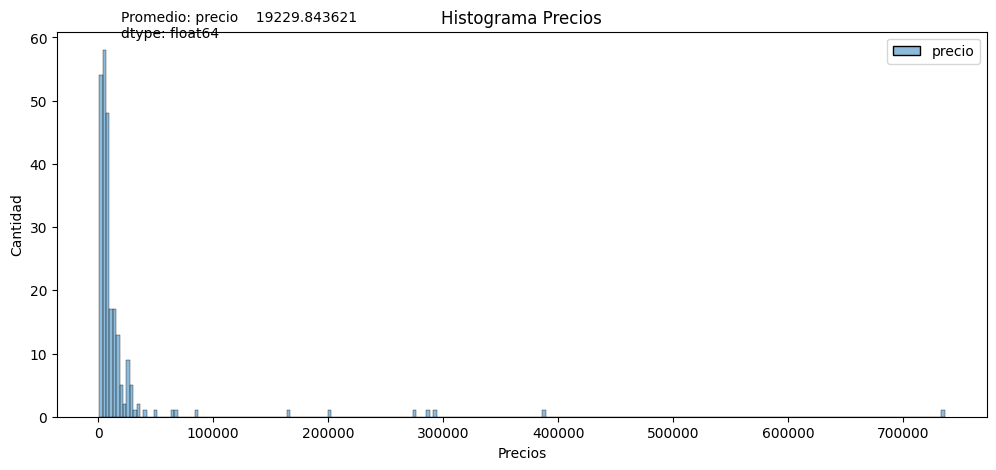

In [55]:
df_precios=df.loc[df.titulo.str.contains('mouse',case= False, na=False),['precio']]

fig,ax=plt.subplots(figsize=(12,5))

sns.histplot(df_precios)
ax.set_title('Histograma Precios')
ax.set_xlabel('Precios')
ax.set_ylabel('Cantidad')
ax.text(20000,60,f"Promedio: {df_precios.mean()}")

In [56]:
#BALANCEADO DE DATASET
#frauds = df.loc[df['Class'] == 1]
#no_frauds = df.drop(index = frauds.index)
#no_frauds = no_frauds.sample(n = 492)
#balanced = pd.concat([no_frauds, frauds])
#balanced['Class'].value_counts()

In [57]:
#MATRIZ DE CORRELACION

#fig, ax = plt.subplots(figsize=(20,20))
#corr= balanced.corr()
#sns.heatmap(corr,ax=ax,annot=True,cmap='BrBG',fmt='.2f',linewidths=0.5,vmin=-1,vmax=1)

In [63]:
#SPLIT
#location=df_users['Location'].str.split(',',n=2,expand=True)

#TODO EN MAYUSCULA E ELIMINA LOS ESPACIOS EN BLANCO
#df_users['City']=location[0].str.upper().str.strip()

In [75]:
#MERGE
#df_books_rating = df_books.merge(df_rating,on='ISBN')

In [85]:
df_pivot=df.pivot_table(columns='titulo',index='url',values='precio')
df_pivot

titulo,APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,"Captura De Vídeo, Hdmi Usb3.0 4k",Computadora Pc Dell Cpu Dual Core 4 Gb Ram Office Windows10,Cpu Water Cooling Deepcool Castle 240rgb V2 Argb 240mm,Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,Pc Cpu Computadora Amd 3.5ghz Dual-core Nueva C/garantia,Pc Lenovo Cpu Intel I3 4gb Ram Oficina Estudio,...,Webcam Soul Xw100 Hd 1280x720 Con Microfono,Western Digital WD Green SN350 WDS100T3G0C 1 TB - Verde,Western Digital WD Red WD40EFAX 4 TB - Rojo,Woox - Atril Base De Dise√±o Apoya Notebook Computadora,X2 Rejilla Filtro Plastica Cooler Turbina 4 Pug 120x120mm Ht,XP-Pen Star G430S - Black,Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,Xiaomi Mi Headphones Basic HSER02JY - Plateado,Yindiao G5 - Black silent,iMac 24 M1 8cpu 8gpu 512gb - Rosa
url,,,,,,,,,,,,,,,,,,,,,
https://articulo.mercadolibre.com.ar/MLA-1100072039-pc-intel-core-i5-10400-h410-8gb-ddr4-ssd-240gb-gab-kit-_JM#position=22&search_layout=stack&type=item&tracking_id=75bfd580-2f7f-47db-92a0-f77bef8852cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100176136-cable-usb-30-a-micro-b-15m-pc-disco-rigido-externo-vention-_JM#position=38&search_layout=stack&type=item&tracking_id=36ad9aaa-93a7-4fbc-8bed-70e23dbf9a6e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100522188-pc-gamer-armada-amd-ryzen-5-5600g-8gb-ssd-240gb-radeon-vega-_JM#position=49&search_layout=stack&type=item&tracking_id=3ee3266c-c940-4b79-98ac-43f6a5532d18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100526113-pc-gamer-armada-amd-ryzen-5-5600g-16gb-ssd-480-radeon-vega-_JM#position=53&search_layout=stack&type=item&tracking_id=36debe9c-9935-43fb-8599-8bcceabf5d4c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100526492-pc-gamer-amd-ryzen-7-5700g-ssd-240gb-8gb-ram-radeon-vega-_JM#position=40&search_layout=stack&type=item&tracking_id=96e26c9d-24ce-4e25-a889-62d3e713c3be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.mercadolibre.com.ar/western-digital-wd-red-wd40efax-4-tb-rojo/p/MLA16085021?pdp_filters=category:MLA1648#searchVariation=MLA16085021&position=30&search_layout=stack&type=product&tracking_id=944ee1aa-d3ba-48ec-abaa-a875efc3c91f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,111455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.mercadolibre.com.ar/xiaomi-mi-dual-mode-wireless-mouse-silent-edition-wxsmsbmw02-negro/p/MLA16244423?pdp_filters=category:MLA1648#searchVariation=MLA16244423&position=15&search_layout=stack&type=product&tracking_id=60b73831-8c3a-415c-b610-e58f8b765cc5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15889.0,NaN,NaN,NaN
https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=20&search_layout=stack&type=product&tracking_id=b6525338-eceb-4601-bd87-b298f7441972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4999.0,NaN,NaN


In [87]:
df_pivot.fillna(0,inplace=True)
df_pivot

titulo,APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,APC Back-UPS BX550CI-AR 550VA entrada y salida de 230V negro,APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,Cable Red Patch Cord 10 Mts Utp Pc Cat 6 Rj45 Ditron,"Captura De Vídeo, Hdmi Usb3.0 4k",Computadora Pc Dell Cpu Dual Core 4 Gb Ram Office Windows10,Cpu Water Cooling Deepcool Castle 240rgb V2 Argb 240mm,Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,Pc Cpu Computadora Amd 3.5ghz Dual-core Nueva C/garantia,Pc Lenovo Cpu Intel I3 4gb Ram Oficina Estudio,...,Webcam Soul Xw100 Hd 1280x720 Con Microfono,Western Digital WD Green SN350 WDS100T3G0C 1 TB - Verde,Western Digital WD Red WD40EFAX 4 TB - Rojo,Woox - Atril Base De Dise√±o Apoya Notebook Computadora,X2 Rejilla Filtro Plastica Cooler Turbina 4 Pug 120x120mm Ht,XP-Pen Star G430S - Black,Xiaomi Mi Dual mode wireless mouse silent edition WXSMSBMW02 - Negro,Xiaomi Mi Headphones Basic HSER02JY - Plateado,Yindiao G5 - Black silent,iMac 24 M1 8cpu 8gpu 512gb - Rosa
url,,,,,,,,,,,,,,,,,,,,,
https://articulo.mercadolibre.com.ar/MLA-1100072039-pc-intel-core-i5-10400-h410-8gb-ddr4-ssd-240gb-gab-kit-_JM#position=22&search_layout=stack&type=item&tracking_id=75bfd580-2f7f-47db-92a0-f77bef8852cc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100176136-cable-usb-30-a-micro-b-15m-pc-disco-rigido-externo-vention-_JM#position=38&search_layout=stack&type=item&tracking_id=36ad9aaa-93a7-4fbc-8bed-70e23dbf9a6e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100522188-pc-gamer-armada-amd-ryzen-5-5600g-8gb-ssd-240gb-radeon-vega-_JM#position=49&search_layout=stack&type=item&tracking_id=3ee3266c-c940-4b79-98ac-43f6a5532d18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100526113-pc-gamer-armada-amd-ryzen-5-5600g-16gb-ssd-480-radeon-vega-_JM#position=53&search_layout=stack&type=item&tracking_id=36debe9c-9935-43fb-8599-8bcceabf5d4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100526492-pc-gamer-amd-ryzen-7-5700g-ssd-240gb-8gb-ram-radeon-vega-_JM#position=40&search_layout=stack&type=item&tracking_id=96e26c9d-24ce-4e25-a889-62d3e713c3be,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.mercadolibre.com.ar/western-digital-wd-red-wd40efax-4-tb-rojo/p/MLA16085021?pdp_filters=category:MLA1648#searchVariation=MLA16085021&position=30&search_layout=stack&type=product&tracking_id=944ee1aa-d3ba-48ec-abaa-a875efc3c91f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,111455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://www.mercadolibre.com.ar/xiaomi-mi-dual-mode-wireless-mouse-silent-edition-wxsmsbmw02-negro/p/MLA16244423?pdp_filters=category:MLA1648#searchVariation=MLA16244423&position=15&search_layout=stack&type=product&tracking_id=60b73831-8c3a-415c-b610-e58f8b765cc5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15889.0,0.0,0.0,0.0
https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=20&search_layout=stack&type=product&tracking_id=b6525338-eceb-4601-bd87-b298f7441972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4999.0,0.0,0.0


In [88]:
df['titulo_id']=pd.factorize(df['titulo'])[0]+1
df

,titulo,url,precio,Mouse,titulo_id
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,75299.0,otros,1
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,698021.0,otros,2
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros,3
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,189999.0,otros,4
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0,otros,5
...,...,...,...,...,...
2192,"Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola",https://articulo.mercadolibre.com.ar/MLA-93478...,4990.0,mouse,1826
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,https://articulo.mercadolibre.com.ar/MLA-91396...,8590.0,otros,1827
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,41999.0,otros,1828
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,https://www.mercadolibre.com.ar/microfono-shur...,155399.0,otros,1829


In [89]:
mapping=df.set_index('titulo_id')['titulo'].to_dict()
mapping

{1: 'Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi Vga',
 2: 'Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)',
 3: 'Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb',
 4: 'Pc Armada Intel Core I5 8gb Ssd240 W10 Office',
 5: "Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p",
 6: 'Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows',
 7: 'Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb',
 8: 'Computadora Cpu Armada Intel Core I5 8 Gb 240 Gb Ssd',
 9: 'Computadora De Oficina / Trabajo  - 8 Gb - Ssd - Office',
 10: 'Computadora Pc Cpu Solarmax Intel Core I7 12va 32gb 960 Ssd',
 11: 'Pc Armada Intel C I3 + 8 Gb Ram Ssd 240 Gab  Kit  W10 Offic ',
 12: 'Monitor gamer Samsung F24T35 led 24" azul y gris oscuro 100V/240V',
 13: 'Pc Armada Intel Core I5 8gb Ssd 480 Gab   Tec Y Mouse  W11',
 14: 'Notebook Ssd Ryzen Computadora Portatil 15.6 Pulgadas Laptop',
 15: 'Cpu Dell 780 - 4 Gb, Disco 250 Gb + Monitor 17 ',
 16: 'Computa

In [ ]:
#Eliminamos duplicados con set y despues lo volvemos a convertir en una lista
#users=list(set(uids))

In [91]:
df.select_dtypes('number')

,precio,titulo_id
0,75299.0,1
1,698021.0,2
2,264999.0,3
3,189999.0,4
4,1573218.0,5
...,...,...
2192,4990.0,1826
2193,8590.0,1827
2194,41999.0,1828
2195,155399.0,1829


In [92]:
df.select_dtypes('object')

,titulo,url,Mouse
0,Monitor Philips Led 24 Pulgadas 241v8l/77 Hdmi...,https://www.mercadolibre.com.ar/monitor-philip...,otros
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,otros
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,otros
3,Pc Armada Intel Core I5 8gb Ssd240 W10 Office,https://articulo.mercadolibre.com.ar/MLA-87481...,otros
4,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,otros
...,...,...,...
2192,"Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola",https://articulo.mercadolibre.com.ar/MLA-93478...,mouse
2193,Soporte Bandeja Notebook Computadora Mesa Cama...,https://articulo.mercadolibre.com.ar/MLA-91396...,otros
2194,Memoria RAM Fury Beast DDR4 gamer color negro ...,https://www.mercadolibre.com.ar/memoria-ram-fu...,otros
2195,Micr√≥fono Shure SM SM57-LC din√°mico cardioi...,https://www.mercadolibre.com.ar/microfono-shur...,otros


In [93]:

df.columns

Index(['titulo', 'url', 'precio', 'Mouse', 'titulo_id'], dtype='object')

In [97]:
df.columns.to_list()

['titulo', 'url', 'precio', 'Mouse', 'titulo_id']

<ipython-input-94-b3d43b504795>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

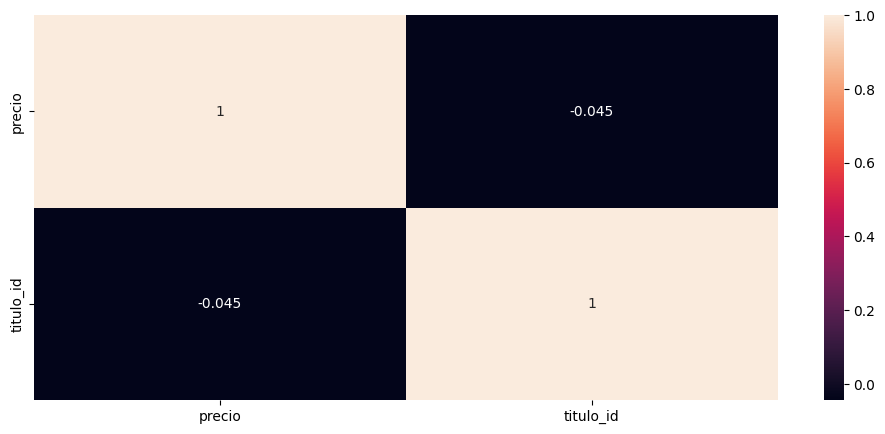

In [94]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [95]:
df.drop(df.loc[(df["precio"]>500000) | (df["precio"]<200000)].index) #No puse inplace entonces no lo reemplaza

,titulo,url,precio,Mouse,titulo_id
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros,3
5,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0,otros,6
29,Pc Armada I7 16 Gigas Ssd 240 Gab Wi Fi Teclad...,https://articulo.mercadolibre.com.ar/MLA-11095...,273999.0,mouse,30
31,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,439999.0,otros,32
42,Pc Gamer Armada Amd Ryzen 5 5600g 6/12 Nucleos...,https://articulo.mercadolibre.com.ar/MLA-11630...,373499.0,otros,42
...,...,...,...,...,...
2126,Procesador gamer Intel Core i5-10600K BX807011...,https://www.mercadolibre.com.ar/procesador-gam...,283982.0,otros,1764
2131,AMD Asus Dual Radeon 6700 Series RX 6700 XT DU...,https://www.mercadolibre.com.ar/amd-asus-dual-...,499999.0,otros,1769
2138,Procesador gamer Intel Core i7-11700 BX8070811...,https://www.mercadolibre.com.ar/procesador-gam...,421686.0,otros,1776
2152,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0,otros,1788


In [96]:
df[(df['precio']<500000)&(df['precio']>200000)&(df['titulo_id']<80)&(df['titulo_id']>30)]





,titulo,url,precio,Mouse,titulo_id
31,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,439999.0,otros,32
42,Pc Gamer Armada Amd Ryzen 5 5600g 6/12 Nucleos...,https://articulo.mercadolibre.com.ar/MLA-11630...,373499.0,otros,42
43,Pc Gamer /fornite /dota 2/lol/csgo - Amd A8 //...,https://articulo.mercadolibre.com.ar/MLA-11179...,229000.0,otros,43
46,Computadora Completa Intel Core I5 16 Gb 480 S...,https://articulo.mercadolibre.com.ar/MLA-14474...,279990.0,otros,46
47,Computadora Cpu Armada Intel Core I5 16 Gb 480...,https://articulo.mercadolibre.com.ar/MLA-11151...,224990.0,otros,47
54,Pc Gamer Armada Intel I5 10400 16gb Ddr4 480gb...,https://click1.mercadolibre.com.ar/mclics/clic...,379916.0,otros,54
60,Pc Armada Intel C I3 + 8 Gb Ssd 240 Wi Fi Nue...,https://articulo.mercadolibre.com.ar/MLA-88517...,239999.0,otros,60
63,Pc Armada Aerocool Ryzen 5600g 480gb Ssd 16gb ...,https://click1.mercadolibre.com.ar/mclics/clic...,425631.0,otros,63
64,Pc Gamer A10 9700 //ddr4 8gb //ssd 240// Radeo...,https://articulo.mercadolibre.com.ar/MLA-92773...,235000.0,otros,64
74,Computadora Completa Intel Core I5 8 Gb 480 Gb...,https://articulo.mercadolibre.com.ar/MLA-13801...,284990.0,otros,74
